# Importação e análise exploratória dos dados

Nesse primeiro arquivo, faremos a analise exploratória dos dados dos experimentos. 

## Importação e análise inicial: conhecendo o data set

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #ignora as mensagens de aviso

In [23]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
df = pd.read_csv(url_dados, compression = 'zip')
df




,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

O bando de dados contém dados sobre experimentos para descobertas de novas drogas (medicamentos, fármacos). A tabela contém 23814 linhas, o que significa que foram feitos 23814 experimentos ou ensaios, realizado em uma cultura de células. 
Em cada experimento foi utilizado um composto (identificado na coluna 'droga'),com uma certa dose (há duas opões: D1 e D1, identificados na coluna 'dose') por um determinado período de tempo (que pode ser 24 horas, 48 horas ou 72 horas, identificado na coluna 'tempo'). 
Há ainda uma coluna 'tratamento', que indica se o experimento foi realizado com um composto de teste (label = 'com_droga') ou com um composto de controle (label = 'com controle'). 
A coluna 'id' é apenas para rotular o experimento.

Para obter essas informações sobre os lables utilizado nas colunas 'tempo', 'dose' e 'tratamento', podemos utilizar o comando unique(), que nos retorna todos os valores de uma linha, sem contar as repetições. 

In [5]:
df['dose'].unique(), df['tempo'].unique(), df['tratamento'].unique()

(array(['D1', 'D2'], dtype=object),
 array([24, 72, 48]),
 array(['com_droga', 'com_controle'], dtype=object))

Também é interessante saber quantos compostos distintos foram utilizados nesses experimentos. Para isso podemos utilizar o comando value_counts() que não apenas nos dará essa informação como contará quantas vezes cada droga apareceu.

In [7]:
df['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
758c4ac3d       1
f5487e91f       1
c0521523c       1
379302187       1
4d7280c91       1
Name: droga, Length: 3289, dtype: int64

Assim, vemos (na informação Length, na última linha) que foram utilizados 3289 compostos distintos. 
Porém os experimentos estão bem desbalanceados: existem drogas que foram utilizadas apenas uma vez e outras que foram utilizadas mais de 200 vezes. A droga cacb2b860 é a que tem maior frquência, sendo utilizada 1866 vezes, enquanto a segunda mais frequente é 87d714366, que foi utilizada 718 vezes. 

Vamos verificar quais drogas foram utlizadas como grupo de controle. Para isso, podemos utilizar uma condicional na coluna 'tratamento' e então passar o comando unique()

In [9]:
df[df.tratamento == 'com_controle']['droga'].unique()

array(['cacb2b860'], dtype=object)

Observamos então que apenas o composto cacb2b860 foi utilizado no grupo de controle. Isso explica porque ele é o composto mais utilizado, tendo mais que o dobro de frequencia que o segundo composto mais frequente.


Além dessas variáveis categóricas, temos centenas de variáveis numéricas tipo float, os g's e os c's. 

**As expressões gênicas**

As colunas g-0, g-1, ... são as expressões gênicas. Vamos tentar entender isso melhor.
Os genes são trechos do DNA que contém informações para sintetizar alguma proteína. Mas essas informações precisam ser transportadas do núcleo para o citoplama através de RNAs mensageiros. Em condições normais, é necessário uma quantiade q de moléculas de RNA para transportar essa informação. Nesse caso, a expressão gênica é 1x. 
Mas em condições não normais, quando a célula é submetida a algum tipo de estímulo, a quantidade de RNA mensageiro produzido para transportar a informação pode variar. 
A expressão gênica é a razão entre a quantidade de RNA produzido em condições com estímulo pela quantidade de RNA produzido em condições normais.
Por exemplo, se em condições normais, são produzidos 4 RNAs, mas com um certo estímulo a produção aumenta para 8 RNAs, a expressão gênica é 2x. Se com um outro estímulo a produção de RNA cai para 2, nesse caso a expressão gênica é 0.5x
Assim, as colunas g-0, g-1, ... contém as expressões gênicas desses genes g-0, g-1, ... quando a situação muda de normal para as condições do experimento. 

Mais informações de como acontece esse processo podem ser encontradas nesse vídeo: https://youtu.be/OzZv8U_DXNk

**As viabilidades celulares**

Os c-0, c-1,...  são tipos de tecidos celulares e as informações nessas colunas são as suas viabilidades celulares. A viabilidade é uma métrica que quantifica a quantidade de células que permaneceram ativas (i.e., vivas) após o experimento. 

Para mais informações, consulte esse vídeo:
https://youtu.be/BxzljDjUbJY


Antes de prosseguir, vamos dar um tratamento na tabela, renomeando algumas colunas. Por exemplo, vamos trocar a coluna 'droga' por 'composto', que parece ser mais adequado. Vamos também tirar os hífens das colunas 'g-x' e 'c-x'. 

In [24]:
#Renomeando as colunas, eliminando '-'
colunas = df.columns.to_numpy()  #cria um array com os nomes das colunas
for i in range(0,colunas.shape[0]):
   colunas[i] = colunas[i].replace('-','')  #faz um loop percorrendo os índices do array, trocando '-' por ''
df.columns = colunas  #renomeia as colunas
df.rename(columns= {'droga':'composto'}, inplace = True) #renomeia a coluna 'droga' para 'composto'
df.tail() #mostra os 5 últimos regristos

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


## Análise exploratória das variáveis categóricas

Vamos agora iniciar uma análise mais profunda dos dados. Para começar, podemos resumir as estatísticas descritivas em uma única tabela, usando o comando describe(). Ela irá resumir informações como máximo, mínimo, média, mediana, desvio padrão e percentis 25, 50 e 75.

In [25]:
df.describe()  #Estatística descritiva dos dados numéricos

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.

Já vimos uma análise inicial do campo 'tratamento', mas vejamos as proporções entre as duas classes. Para isso, podemos passar o parâmetro normalize = True no comando value_counts().

In [12]:
df['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

Podemos também plotar um gráfico de barras com esses valores, para termos uma visualização mais visual.

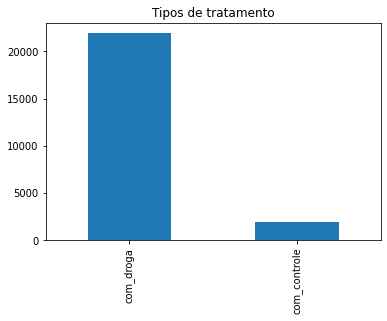

In [13]:
df['tratamento'].value_counts().plot.bar(title = 'Tipos de tratamento')

Façamos o mesmo com as colunas 'tempo' e 'dose' 

In [14]:
df['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

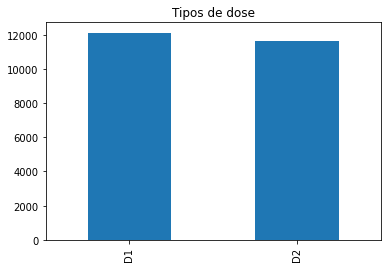

In [ ]:
df['dose'].value_counts().plot.bar(title = 'Tipos de dose')

In [15]:
df['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

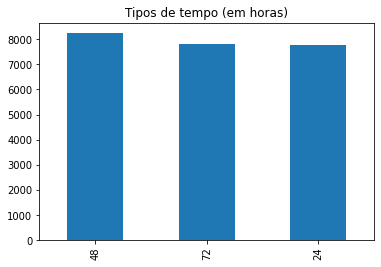

In [ ]:
df['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas)')

Os tipos de dose e os tempos de administração estão bem distribuídos. Os dados estão balanceados, como era de se esperar em um bom experimento. 
Vejamos se as doses e os tempos estão balanceados entre si.

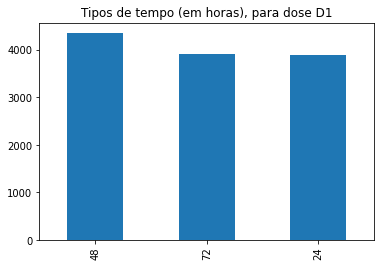

In [18]:
df[df.dose == 'D1']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D1') 

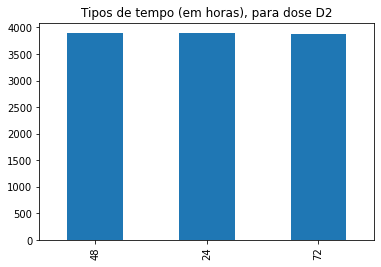

In [17]:
df[df.dose == 'D2']['tempo'].value_counts().plot.bar(title = 'Tipos de tempo (em horas), para dose D2')

## Analise dos compostos

Faremos agora uma análise descritiva dos compostos. Para isso, começaremos conhecendo quais são os compostos com maior frequência. 

In [19]:
df['composto'].value_counts()[0:15]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
52d1e6f43      18
83a9ea167      18
d488d031d      18
11f66c124      14
1a52478dc      14
Name: composto, dtype: int64

Observa-se então que apenas 9 compostos tem frequência acima de 100. Vamos salvar essa informação em uma lista.

In [26]:
cod_composto = df['composto'].value_counts().index[0:9]

Agora, vejamos isso em um gráfico de barras.

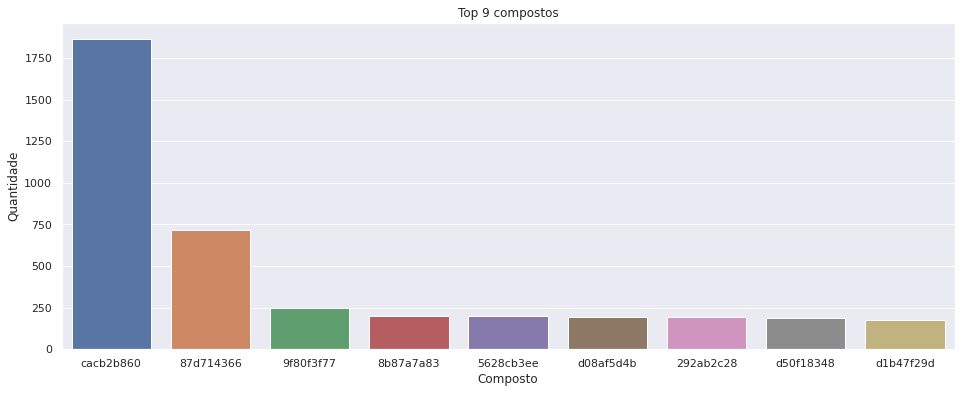

In [27]:
from matplotlib.pyplot import figure
figure(figsize=(16, 6)) #para deixar o gráfico maior e mais legível
sns.set()
ax = sns.countplot(x = 'composto', data = df.query('composto in @cod_composto'), order = df['composto'].value_counts().index[0:9])
ax.set_title('Top 9 compostos')
ax.set(xlabel='Composto', ylabel= 'Quantidade') #muda o nome dos eixos
plt.show()

Observe que há uma grande discrepância na quantidade de compostos. O composto cacb2b860 aparece com uma quantidade muito maior. Este é exatamente o mesmo composto usando no grupo de controle. 

Vamos começar a estudar a relação entre os compostos e as expressões gênicas. Vejamos o histograma das variáveis g0 e g1

Text(0, 0.5, 'Contagem')

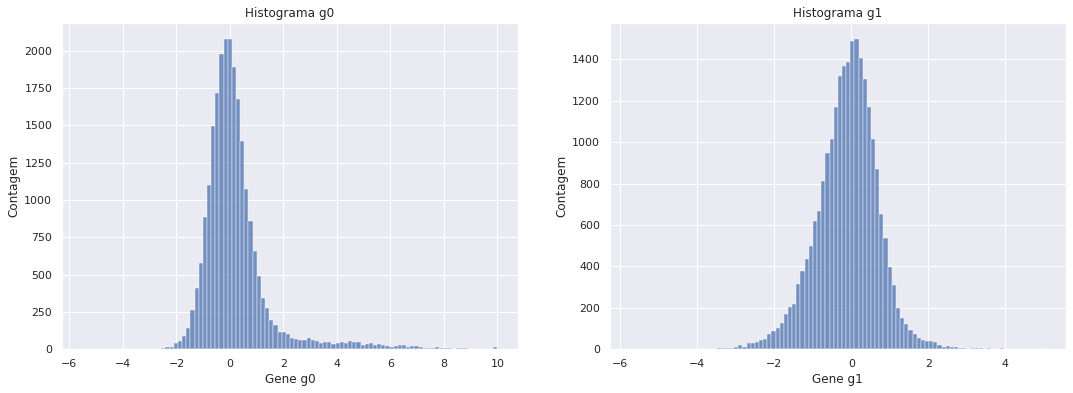

In [28]:
figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')
plt.title('Histograma g0')
plt.xlabel('Gene g0')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')
plt.title('Histograma g1')
plt.xlabel('Gene g1')
plt.ylabel('Contagem')

Agora os histogramas comparados com os gráficos boxplot

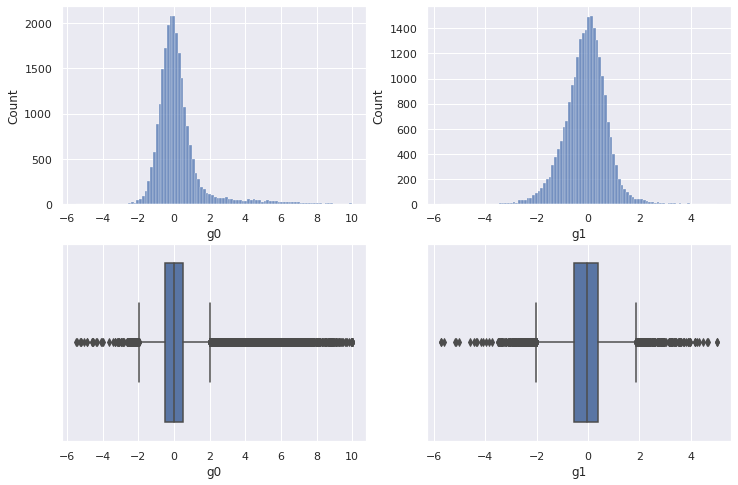

In [29]:

figure(figsize=(12, 8))

fig = plt.subplot(2, 2, 1)
sns.histplot(data = df['g0'], bins = 100, stat = 'count')

plt.subplot(2, 2, 3)
sns.boxplot(x = 'g0', data = df)

plt.subplot(2, 2, 2)
sns.histplot(data = df['g1'], bins = 100, stat = 'count')

plt.subplot(2, 2, 4)
sns.boxplot(x = 'g1', data = df)


Vemos então que as expressões gênicas g0 e g1 estão numa distribuição próxima à distribuição normal. 
Esses dados provavelmente foram normalizados em um pré-processamento. Isso é importante, pois algums modelos de machine learning funcionam melhor com os dados na mesma escala, como por exemplo o Naive Bayes.

### Boxplots

Aprofundando ainda mais a análise, vamos estudar os boxplot dos genes g0 e g1 comparados com os tipos de tratamento

Text(0.5, 1.0, 'Boxplot do gene g1 comparado com o tipo de tratamento')

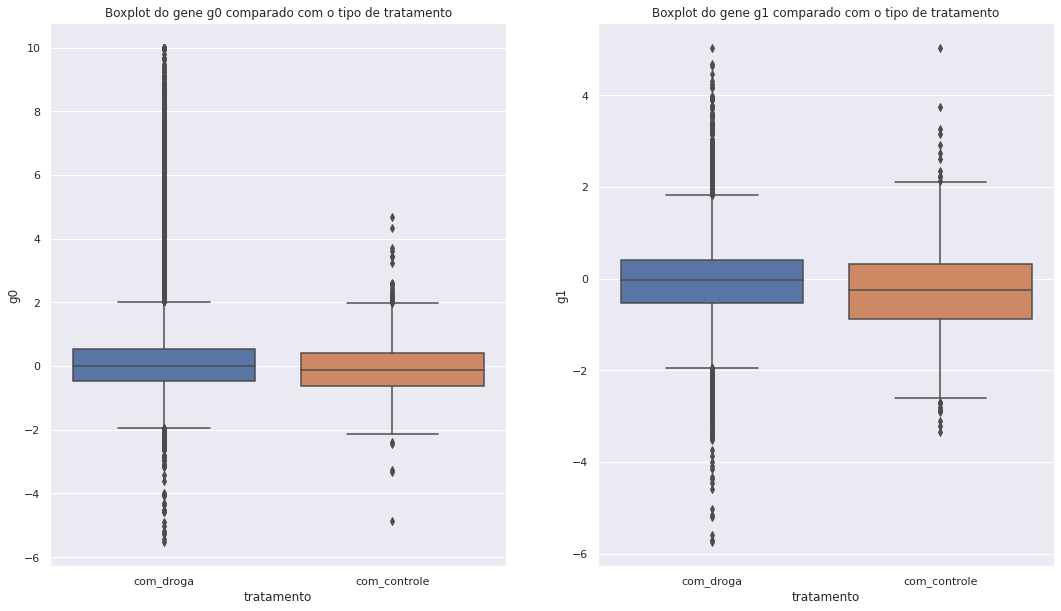

In [30]:
figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df)
plt.title('Boxplot do gene g0 comparado com o tipo de tratamento')


plt.subplot(1, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df)
plt.title('Boxplot do gene g1 comparado com o tipo de tratamento')


Observamos que ambas as variáveis possuem muitos outliers, ou seja, valores muito distantes da mediana. Porém, esses outliers se concentram quando consideramos a categoria 'com_droga'. Isso levanta o questionamento: quais desses compostos estão produzindo mais outliers?
Inicialmente, vejamos como cada um dos 8 compostos mais frequentes afetam o boxplot de g0.

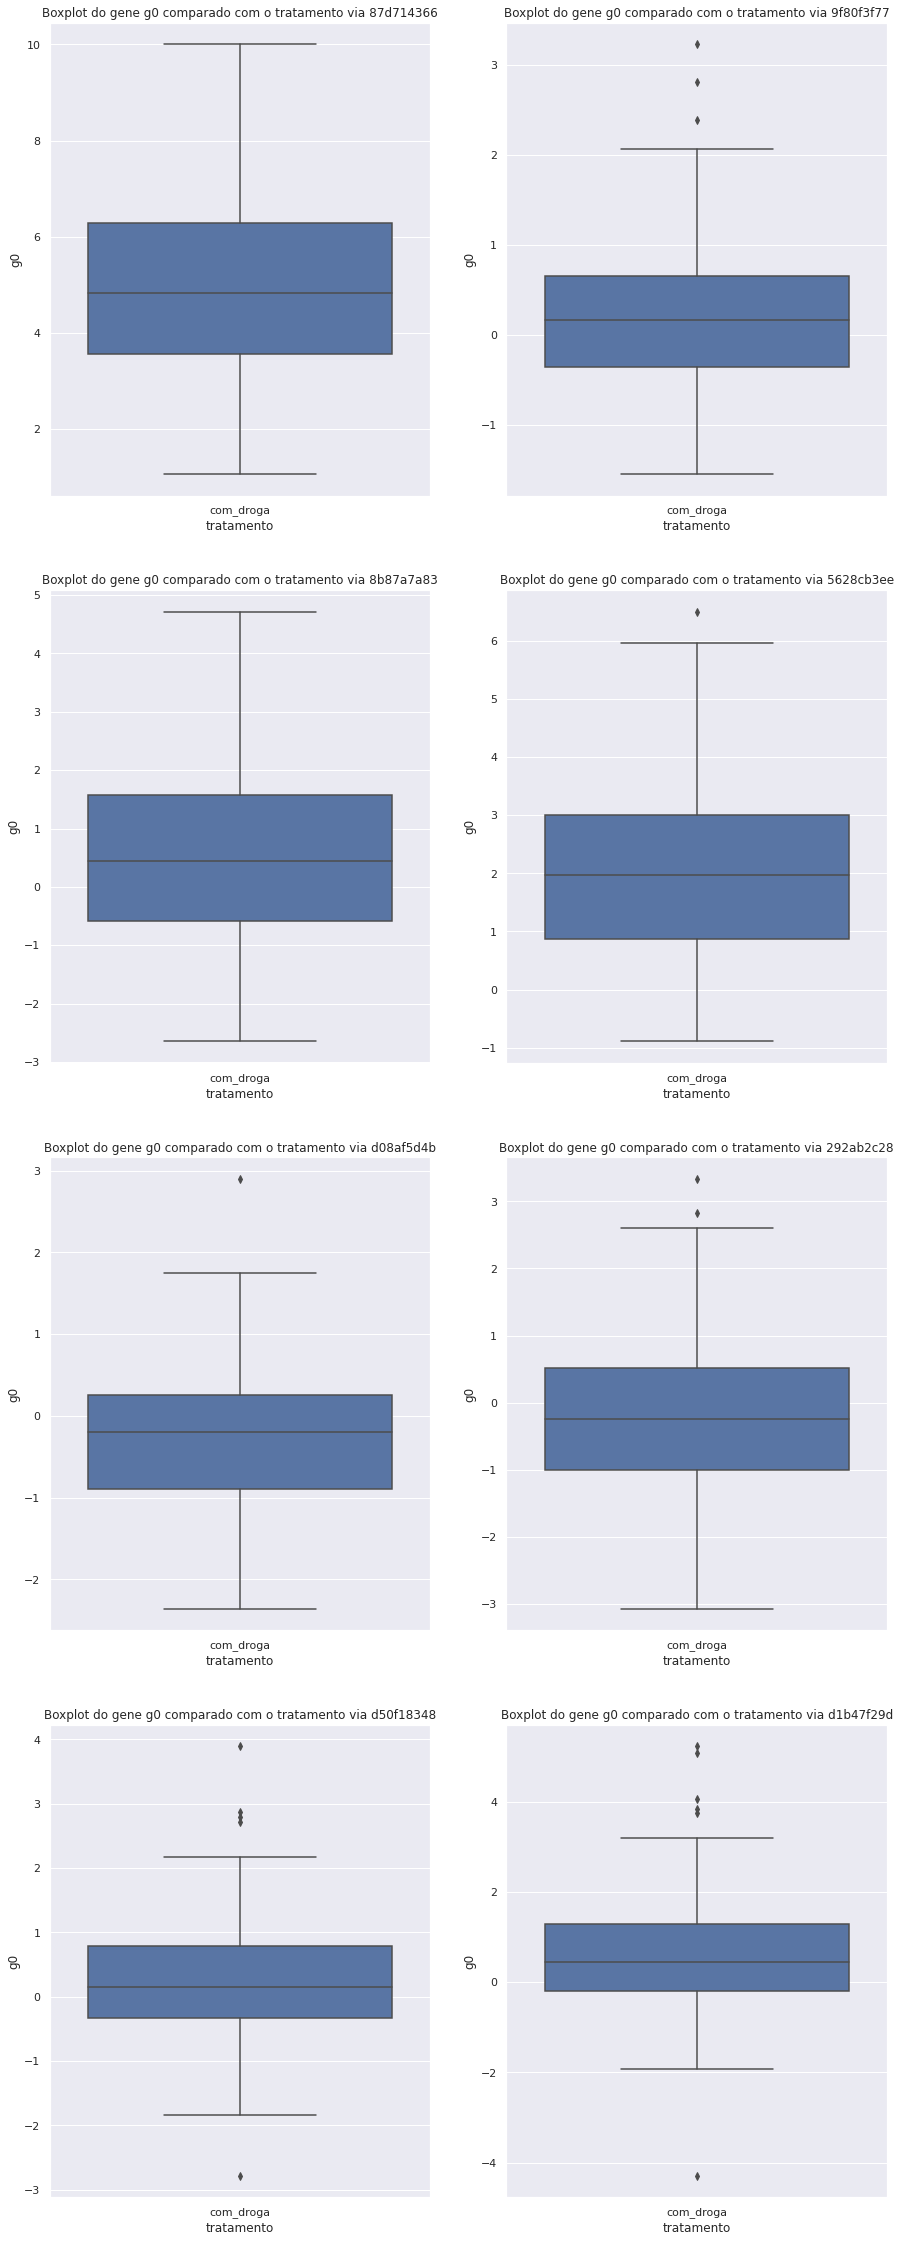

In [31]:
figure(figsize=(15, 40))


plt.subplot(4, 2, 1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '87d714366'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 87d714366')


plt.subplot(4, 2, 2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '9f80f3f77'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 9f80f3f77')

plt.subplot(4, 2, 3)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '8b87a7a83'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 8b87a7a83')

plt.subplot(4, 2, 4)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '5628cb3ee'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 5628cb3ee')

plt.subplot(4, 2, 5)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd08af5d4b'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d08af5d4b')

plt.subplot(4, 2, 6)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == '292ab2c28'])
plt.title('Boxplot do gene g0 comparado com o tratamento via 292ab2c28')

plt.subplot(4, 2, 7)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd50f18348'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d50f18348')

plt.subplot(4, 2, 8)
sns.boxplot(x = 'tratamento', y = 'g0', data = df[df.composto == 'd1b47f29d'])
plt.title('Boxplot do gene g0 comparado com o tratamento via d1b47f29d')

plt.show()

Observamos então que há poucos outliers vindo de tratamento com os 9 compostos mais frenquentes. Portanto, esses outliers devem vir de tratamento com compostos menos frequentes. Vejamos isso em outro bloxpot

Text(0.5, 1.0, 'gene g0 x tratamento com os compostos mais frequentes')

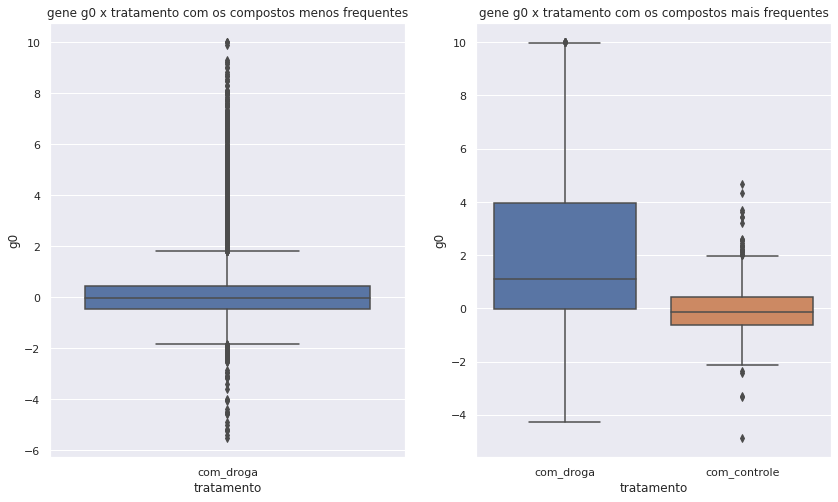

In [32]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto not in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g0', data = df.query('composto in @cod_composto'))
plt.title('gene g0 x tratamento com os compostos mais frequentes')


**Conclusão**: com respeito ao gene g0, as drogas mais frequentes apresentam poucos outliers, já as drogas menos frequentes apresentam uma grande quantidade de outliers. 

Text(0.5, 1.0, 'gene g1 x tratamento com os compostos mais frequentes')

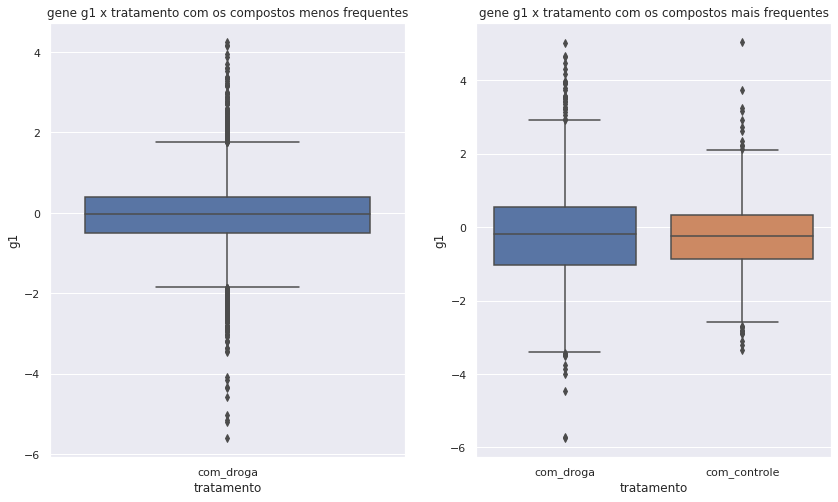

In [33]:
figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto not in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos menos frequentes')

plt.subplot(1,2,2)
sns.boxplot(x = 'tratamento', y = 'g1', data = df.query('composto in @cod_composto'))
plt.title('gene g1 x tratamento com os compostos mais frequentes')


Observamos que algo semelhante não ocorre com o gene g1, por exemplo. 

### Tabelas de frequência


Podemos extrair boas informações de tabelas de frequencias.

In [34]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento']) #sem normalizacão

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

De cara já percebemos que as doses parecem manter as mesmas proporções entre o grupo de controle e o grupo de estudos. Podemos ser mais precisos, ao normalizar a tabela pelas linhas. 

In [35]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='index') #normalizado pela linha

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Agora está bem claro o quão próximos estão os valores das proporções. 
Se quisermos, podemos também normalizar pelas colunas.

In [36]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='columns')  #normalizado pela coluna

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

Ao normalizar pelas colunas, observamos que os seis tipos de tratamento (2 tipos de doses x 3 tipos de tempos) são igualmente distribuídos, tanto no grupo de controle quanto no grupo de estudos. 

Podemos refinar ainda mais o uso da tabela de frequencia, ao incuir outras informações. Por exemplo, podemos estar interessando em saber a média da variação gênica g0 para cada uma das seis possibilidades de tratamento, como mostra a próxima tabela.

In [37]:
#Mostra o valor média do gene g0 para cada uma das linhas da tabela de frequencia
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['g0'], aggfunc=  'mean') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

Ou podemos estar interessados no valor máximo da variação gênica g0:

In [38]:
#Mostra o valor máximo do gene g0 para cada uma das linhas da tabela de frequencia
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['g0'], aggfunc=  'max') 

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

O comando crosstab() não é o único que pode ser utilizado para cirar tabelas de frequencias. Vejamos outros métodos.

In [39]:
#Tabela de frequência usando o groupby
tabela = df.groupby(by=['dose','tempo'])['tratamento'].value_counts()
tabela.unstack() #deixa em um formato bonito

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [40]:
#Uma outra possibilidade com groupby seria
tab = pd.DataFrame(df.groupby(by = ['dose', 'tempo'])['tratamento'].value_counts())
tab

tratamento
dose tempo tratamento              
D1   24    com_droga           3585
           com_controle         301
     48    com_droga           4011
           com_controle         343
     72    com_droga           3600
           com_controle         307
D2   24    com_droga           3581
           com_controle         305
     48    com_droga           3591
           com_controle         305
     72    com_droga           3580
           com_controle         305

Também é possível obter resultados semelhantes usando o melt(). 

In [41]:
#Uma possibilidade seria
tab1 = pd.melt(frame= df, id_vars= ['tratamento', 'dose'], value_vars= ['tempo']).value_counts()
tab1.unstack()

value                         24    48    72
tratamento   dose variable                  
com_controle D1   tempo      301   343   307
             D2   tempo      305   305   305
com_droga    D1   tempo     3585  4011  3600
             D2   tempo     3581  3591  3580

In [42]:
#Outra maneira de fazer seria
tab1 = pd.DataFrame(pd.melt(frame= df, id_vars= ['tratamento', 'dose'], value_vars= ['tempo']).value_counts())
tab1

0
tratamento   dose variable value      
com_droga    D1   tempo    48     4011
                           72     3600
             D2   tempo    48     3591
             D1   tempo    24     3585
             D2   tempo    24     3581
                           72     3580
com_controle D1   tempo    48      343
                           72      307
             D2   tempo    72      305
                           48      305
                           24      305
             D1   tempo    24      301

Note que usando esse último código, o valores são passados de forma descrecente, deixando a organização dos rótulo um pouco bagunçada. 

### Dispersão e correlação

Vejamos agora a dispersão e a correlação entre algumas das variáveis.

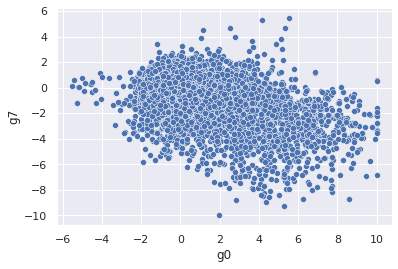

In [43]:
#Gráfico de dispersão entre g0  e g7
sns.scatterplot(x = 'g0', y = 'g7', data= df)

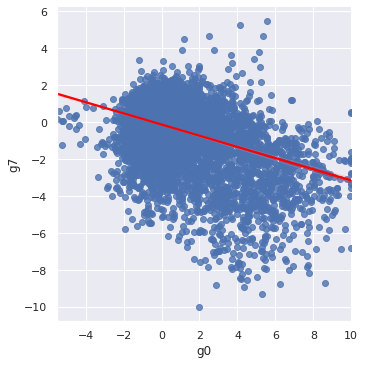

In [44]:
#linha de tendência
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'})

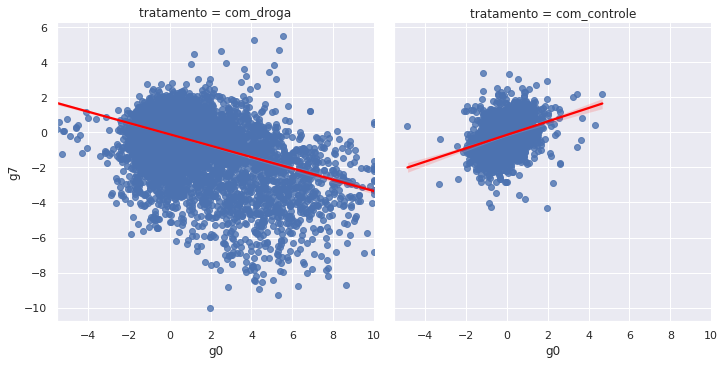

In [45]:
#linha de tendência, separando por tipos de tratamentos
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'}, col = 'tratamento')

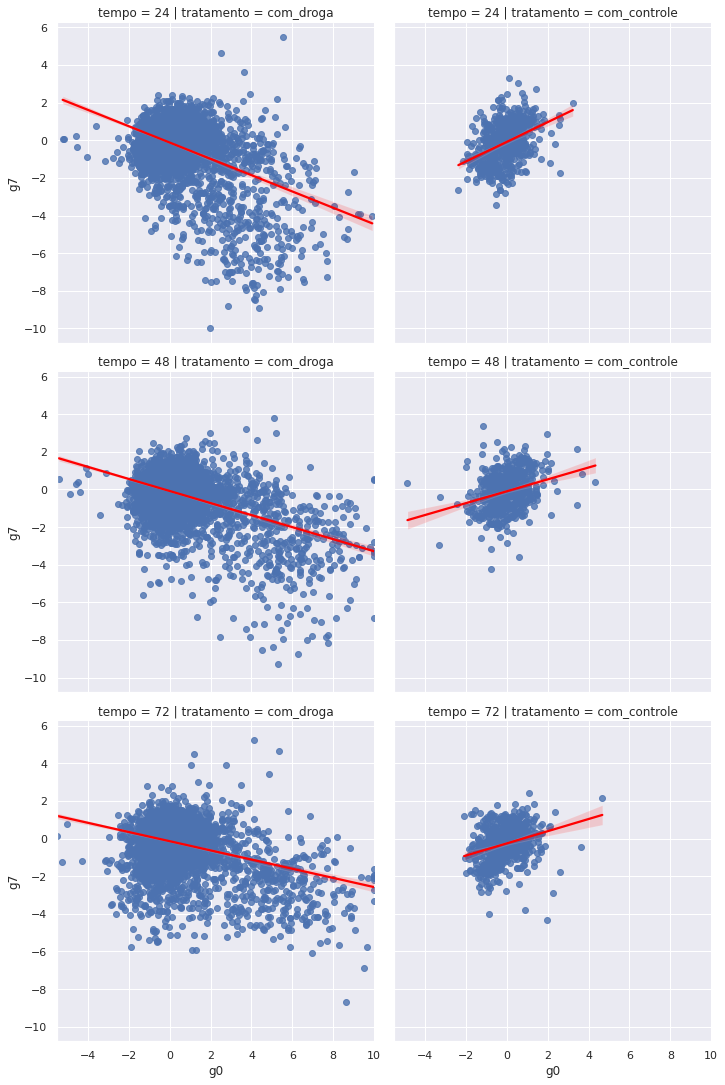

In [46]:
#linha de tendência, separando os tratamentos e os tempos
sns.lmplot(x = 'g0', y = 'g7', data= df, line_kws={'color':'red'}, col = 'tratamento', row = 'tempo')

Gráficos de dispersão são bons para termos uma visualização clara da correlação entre as variáveis. Nos exemplos, a variável g7 parece ter uma pequena correlação negativa com a variável g0. Isso é, observa-se a seguinte tendência: quando g0 aumenta, g7 diminui, mas numa taxa baixa.

Vejamos a correlação entre g0 e g8:

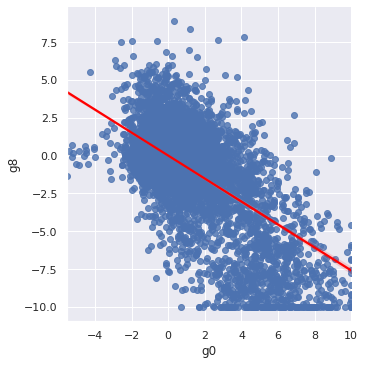

In [47]:
sns.lmplot(x = 'g0', y = 'g8', data= df, line_kws={'color':'red'})

Aqui observa-se também uma tendência de baixa, mas bem mais acentuada. A variável g8 possui uma correlação negativa com g0 bem maior do que a variável g7.

Podemos resumir todas essas informações em uma única tabela com valores numéricos:

In [ ]:
#Correlação entre os genes
df.loc[:,'g0':'g771'].corr()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,...,0.365095,-0.528006,0.295970,0.067108,-0.250243,-0.110665,-0.214344,-0.280492,-0.036098,-0.128288,-0.498922,-0.469595,0.673664,0.538050,0.297528,0.066530,0.240252,-0.170949,0.485924,-0.093815,0.397476,0.017923,0.321260,-0.131709,-0.133430,0.178220,0.201902,-0.205648,-0.676835,-0.433554,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,...,-0.015556,-0.017184,0.043104,-0.189662,-0.050194,-0.007878,-0.083539,-0.042175,0.014307,-0.134166,-0.026985,0.088382,-0.077453,0.015545,-0.027527,-0.071078,-0.095445,0.049612,-0.040518,-0.074277,-0.022356,0.125763,-0.082779,0.020292,-0.023171,-0.207192,-0.066570,-0.057007,0.002062,0.029795,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,...,0.089525,-0.140916,0.008587,0.042106,-0.018846,-0.008093,-0.074404,-0.080120,-0.020085,-0.028099,-0.098775,-0.113000,0.175916,0.119166,0.071051,0.025358,0.078971,-0.086326,0.149456,0.033432,0.124239,-0.006327,0.120148,-0.041162,-0.030040,0.048549,0.096369,0.000494,-0.172627,-0.130200,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,...,0.039519,0.000851,0.011655,-0.116724,0.304819,-0.087159,-0.134135,-0.031211,0.174116,0.060289,-0.119276,-0.140391,0.110547,0.145925,0.155011,0.049182,-0.007754,-0.128488,0.078139,0.012422,0.040728,0.164467,0.171886,-0.069777,0.066560,0.102111,-0.036922,0.111994,-0.133740,-0.226928,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,...,0.215930,-0.292602,-0.008241,-0.005070,-0.284391,-0.116918,-0.252399,-0.250280,0.000141,-0.172896,-0.324769,-0.291644,0.302912,0.222951,0.144028,-0.020950,0.129354,-

Vamos agora criar um mapa de calor (heatmap) para visualizar nossas correlações de forma mais gráfica. 

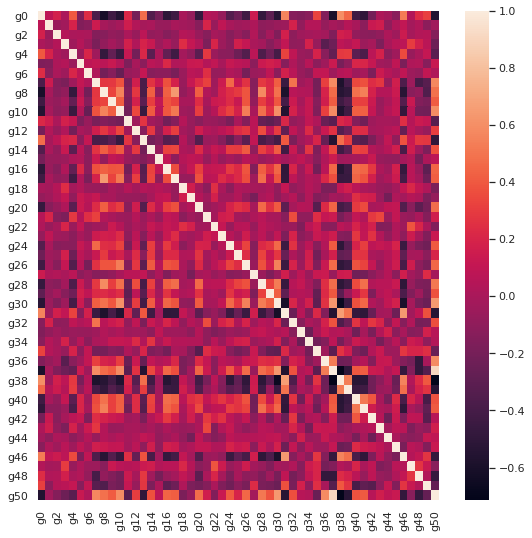

In [ ]:
#Uma possível maneira de fazer é assim:
figure(figsize= (9,9))
sns.heatmap(data= df.loc[:,'g0':'g50'].corr())

Podemos fazer algo um pouco mais elaborado e elegante, como visto na aula:


In [ ]:
corr = df.loc[:,'g0':'g50'].corr() #cria uma variável que vai armazenar a tabela com as correlações

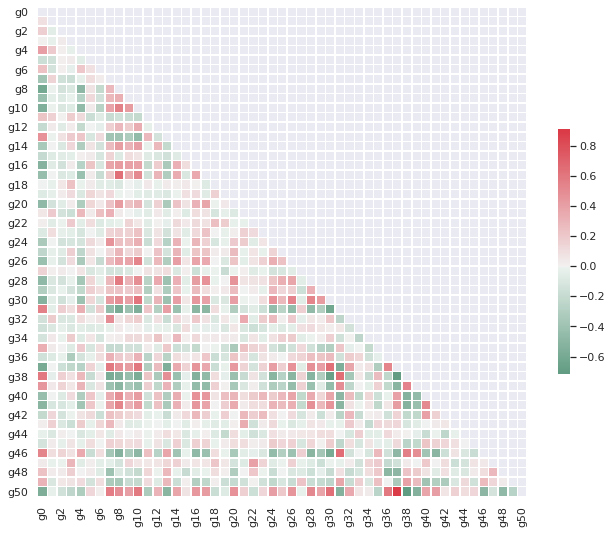

In [ ]:
mascara = np.triu(np.ones_like(corr, dtype=bool))
#numpy.triu() retorna uma cópia do array de entrada, com os elementos abaixo da diagonal principal zerados
#numpy_ones_like() retorna uma array contendo apenas 1's, do mesmo tamanho que o array de entrada

f, ax = plt.subplots(figsize=(11, 9))
#cria um ambiente para plotar várias figuras, em um espaço 11 por 9

cmap = sns.diverging_palette(150, 10, as_cmap=True)
#cria uma paleta de cores em degradê

sns.heatmap(corr, mask=mascara, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#cria um mapa de calor com base na tabela de correlações, com a paleta de cores escolhida e utilziando a máscara definida acima.
#Observe que a máscara tem zeros acima da diagonal superior, e o tipo foi definido como boleano. Logo acima da diagonal temos False.
#Ou seja, acima da diagonal a figura (o mapa de calor) será apagado. 

Vamos agora calcular a correlação entre as expressões gênicas gx e as viabilidades celuares cx.
Não será tão direto. Vamos criar essa tabela em um data frame separado.

In [55]:
tb_corr = pd.DataFrame()
tb_corr['gene'] = df.columns[5:777]
tb_corr
#cria o data frame que vai armazenar as correlações e cria a primeira coluna, com as variações gênicas

,gene
0,g0
1,g1
2,g2
3,g3
4,g4
...,...
767,g767
768,g768
769,g769
770,g770


In [56]:
a = 0 #índice para contar as iterações
for c in df.columns[777:]: #faremos um loop pelas colunas das variações gênicas
  lista_corr = []          #cria uma lista vazia, onde iremos armazenar os valores das correlações, na próxima instância do loop
  for g in df.columns[5:777]: #ainda dentro do primeiro loop, faremos um segundo, percorrendo as colunas dos genes
      lista_corr.append(df[g].corr(df[c])) #calcula a correlação de g com c e armazena na lista. A lista contém as correlações de c com todos os g.
  col_name = 'correlação do gene com c' + str(a) #define o nome da coluna. O índice de iteração será útil aqui
  a = a+1                                  #contamos a iteração
  tb_corr[col_name] = lista_corr  #cria uma coluna no data frame com as correlações de c
  #esse código vai demorar alguns segundo para rodar

In [57]:
#pro fim, o data frame com as correlações
tb_corr

,gene,correlação do gene com c0,correlação do gene com c1,correlação do gene com c2,correlação do gene com c3,correlação do gene com c4,correlação do gene com c5,correlação do gene com c6,correlação do gene com c7,correlação do gene com c8,correlação do gene com c9,correlação do gene com c10,correlação do gene com c11,correlação do gene com c12,correlação do gene com c13,correlação do gene com c14,correlação do gene com c15,correlação do gene com c16,correlação do gene com c17,correlação do gene com c18,correlação do gene com c19,correlação do gene com c20,correlação do gene com c21,correlação do gene com c22,correlação do gene com c23,correlação do gene com c24,correlação do gene com c25,correlação do gene com c26,correlação do gene com c27,correlação do gene com c28,correlação do gene com c29,correlação do gene com c30,correlação do gene com c31,correlação do gene com c32,correlação do gene com c33,correlação do gene com c34,correlação do gene com c35,correlação do gene com c36,correlação do gene com c37,correlação do gene com c38,...,correlação do gene com c60,correlação do gene com c61,correlação do gene com c62,correlação do gene com c63,correlação do gene com c64,correlação do gene com c65,correlação do gene com c66,correlação do gene com c67,correlação do gene com c68,correlação do gene com c69,correlação do gene com c70,correlação do gene com c71,correlação do gene com c72,correlação do gene com c73,correlação do gene com c74,correlação do gene com c75,correlação do gene com c76,correlação do gene com c77,correlação do gene com c78,correlação do gene com c79,correlação do gene com c80,correlação do gene com c81,correlação do gene com c82,correlação do gene com c83,correlação do gene com c84,correlação do gene com c85,correlação do gene com c86,correlação do gene com c87,correlação do gene com c88,correlação do gene com c89,correlação do gene com c90,correlação do gene com c91,correlação do gene com c92,correlação do gene com c93,correlação do gene com c94,correlação do gene com c95,correlação do gene com c96,correlação do gene com c97,correlação do gene com c98,correlação do gene com c99
0,g0,-0.624116,-0.624810,-0.639789,-0.604041,-0.606231,-0.629189,-0.669697,-0.608954,-0.642211,-0.630989,-0.626020,-0.631486,-0.629841,-0.643529,-0.622502,-0.647751,-0.638829,-0.678957,-0.594877,-0.643239,-0.684132,-0.630950,-0.543857,-0.579103,-0.660192,-0.605740,-0.620731,-0.661781,-0.647510,-0.615229,-0.653816,-0.659935,-0.646008,-0.656088,-0.649368,-0.639943,-0.606850,-0.565831,-0.627974,...,-0.662186,-0.639153,-0.665249,-0.604982,-0.621192,-0.646914,-0.630096,-0.625521,-0.643556,-0.622139,-0.655613,-0.637361,-0.669361,-0.666255,-0.541994,-0.660842,-0.540702,-0.647280,-0.670072,-0.592806,-0.644508,-0.577032,-0.621314,-0.673295,-0.588529,-0.660818,-0.625025,-0.625130,-0.627185,-0.682893,-0.648726,-0.629025,-0.633479,-0.668520,-0.656116,-0.600758,-0.646784,-0.622840,-0.640484,-0.609238
1,g1,-0.037405,-0.030558,-0.039616,0.011899,-0.027014,-0.004664,-0.027941,-0.003155,-0.016199,0.012004,-0.011896,-0.028692,-0.016804,-0.039030,-0.018724,0.001283,-0.020506,-0.028191,-0.006079,-0.004661,-0.009059,-0.013806,0.052851,0.019902,-0.015551,0.020494,-0.021502,-0.023190,-0.026067,-0.016824,-0.008202,-0.035886,-0.020831,-0.016770,0.006563,-0.005731,-0.032461,-0.037041,-0.027810,...,-0.040883,-0.027389,-0.013518,-0.005513,0.004970,0.000605,0.005983,-0.025452,-0.014658,-0.016301,-0.035473,0.004021,-0.041172,-0.023066,0.004179,-0.020136,0.023721,-0.003363,-0.044079,0.006385,-0.004805,-0.010185,0.002633,-0.022321,-0.018388,-0.020843,-0.016555,0.011173,-0.037424,-0.008322,-0.034557,-0.000934,-0.022478,-0.034891,-0.042638,-0.011237,-0.022127,-0.008487,-0.002824,-0.002308
2,g2,-0.168656,-0.178692,-0.176733,-0.156894,-0.180127,-0.170701,-0.181008,-0.175473,-0.178634,-0.163261,-0.180958,-0.176356,-0.180042,-0.183370,-0.174772,-0.180545,-0.162327,-0.177785,-0.169176,-0.170238,-0.182883,-0.172854,-0.137744,-0.193688,-0.170649,-0.171545,-0.179031,-0.184632,

Apesar de pouco usual, com as correlações organizadas em um data frame dessa forma, podemos rapidamente responder algumas perguntas que possamos ter. 
Por exemplo: qual gene tem maior correlação com c0?

In [58]:
print('O gene com maior correlação com c0 é', tb_corr[tb_corr['correlação do gene com c0'] == tb_corr['correlação do gene com c0'].max()].iloc[0,0])
print('O valor da correlação é', tb_corr['correlação do gene com c0'].max())

O gene com maior correlação com c0 é g760
O valor da correlação é 0.7739822187115112
